In [1]:
%pylab inline
#from ipywidgets import *
from IPython.html.widgets import *

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
S0=matrix([[1,0],[0,1]])
S1=matrix([[0,1],[1,0]])
S2=matrix([[0,-1j],[1j,0]])
S3=matrix([[1,0],[0,-1]])
N=zeros_like(S0);
I=1.j

In [3]:
def matafn(h):
    'Array flatten a matrix list of appropriate dimensions'
    H=hstack(h[0])
    for sor in range(1,len(h)):
        H=vstack([H,hstack(h[sor])])
    return H

In [4]:
def wilson_loop(hamfun,*hamargs,
                b1=array([2*pi,0]),
                b2=array([0,2*pi]),
                p1ran=linspace(0,0.5,100),
                p2ran=linspace(0,1,7,endpoint=False),
                **kwargs):
    '''
    Calculating Z2 invariant via Wilson loops of slices 
    of the occupied bands in k-space,
    given a function hamfun(kx,ky,*hamargs)
    and k space reciprocal lattice vectors b1,b2.
    '''
    dim=len(hamfun(0,0,*hamargs))
    dat=[]
    for p1 in p1ran:
        WL=eye(dim)
        for p2 in p2ran:
            kx=(p1*b1+p2*b2)[0]
            ky=(p1*b1+p2*b2)[1]
            H=hamfun(kx,ky,*hamargs)
            eigdat=eigh(H);
            #P=eigdat[1][:,eigdat[0]<0]*eigdat[1][:,eigdat[0]<0].H
            P=eigdat[1][:,:(dim/2)]*eigdat[1][:,:(dim/2)].H
            WL=P*WL
        weig=eig(WL);
        indx=where(abs(weig[0])>10**-10)[0]
        dat.append(sort(angle(weig[0][indx])))       
        
    return  (p1ran,dat)

In [59]:
a1=matrix([[sqrt(3)],
           [1]])/2
a2=matrix([[-sqrt(3)],
           [1]])/2

def ham_2nn(kx,ky,m,mz):  
    t=1;
    t1=t#*0.9
    t2=t
    t3=t
    k=matrix([[kx,ky]])
    A0=I*m*S1;
    A1=I*m/2*(-S1+sqrt(3)*S2);
    A2=I*m/2*(-S1-sqrt(3)*S2);
    B=I*mz*S3;
    
    
    u=matafn([[       N,      t2*S0+A1+B,        t3*S0+A0+B],
             [ t2*S0+A0+B,    t3*S0+A2+B,                 N],
             [ t3*S0+A1+B,        N,             t2*S0+A2+B]]);
    
    U=matafn([[0*u,   u],
              [u.H, 0*u]])

    T1=matafn([[N,N,N,N,N,N],
          [N,N,N,N,N,t1*S0],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
    T2=matafn([[N,N,N,t1*S0,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
    T3=matafn([[N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,t1*S0,N,N,N],
          [N,N,N,N,N,N]])
    H=U+exp(I*(k*a1)[0,0])*T1+exp(I*(k*a2)[0,0])*T2+exp(I*(k*(a1+a2))[0,0])*T3+\
    (exp(I*(k*a1)[0,0])*T1+exp(I*(k*a2)[0,0])*T2+exp(I*(k*(a1+a2))[0,0])*T3).H
    
    return H

In [60]:
RI=matafn([[N,N,N,S3,N,N],
           [N,N,N,N,N,S3],
           [N,N,N,N,S3,N],
           [S3,N,N,N,N,N],
           [N,N,S3,N,N,N],
           [N,S3,N,N,N,N]])

In [61]:
R0=matafn([[N,N,N,S0,N,N],
           [N,N,N,N,N,S0],
           [N,N,N,N,S0,N],
           [S0,N,N,N,N,N],
           [N,N,S0,N,N,N],
           [N,S0,N,N,N,N]])

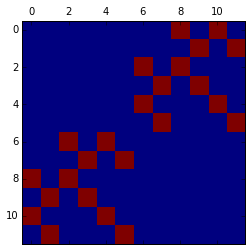

In [62]:
matshow(abs(RI*ham_2nn(0,0,.56,.345)*RI-ham_2nn(0,0,.56,.345)))

In [63]:
krany=linspace(-2*pi,0,300)
kranx=linspace(0,2*pi/sqrt(3),240)
kran=append(krany,kranx)

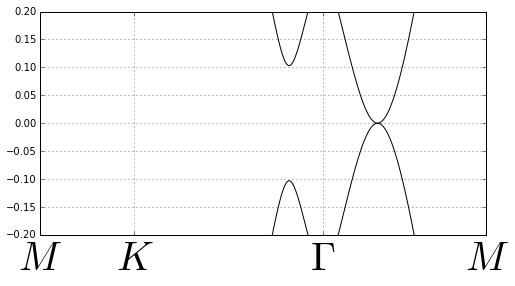

In [64]:
@interact(m=(-1,1,0.001),mz=(0,.8,0.001))
def play_2nn(m=0,mz=0):
    dat=[]
    for kk in krany:
        dat.append(eigvalsh(ham_2nn(0,kk,m,mz)))
    for kk in kranx:
        dat.append(eigvalsh(ham_2nn(kk,0,m,mz)))
    plot(kran,dat,'k-');
    grid()
    xlim(-2*pi,2*pi/sqrt(3));
    xticks([-2*pi,-4*pi/3,0,2*pi/sqrt(3)],[r'$M$',r'$K$',r'$\Gamma$',r'$M$'],fontsize=40);
    #yticks(linspace(-9,9,7),list(map(lambda x:r"$"+str(x)+r"\gamma_0$" ,(arange(-3,4)) )),fontsize=30)
    ylim(-.2,.2);
    #xlim(-0.1,0.1);

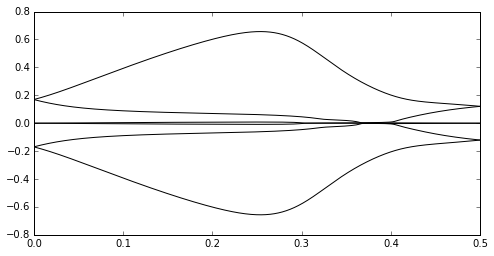

In [68]:
ran,dat=wilson_loop(ham_2nn,*[2,.012],
                    b1=2*pi*array([1/sqrt(3),1]),
                    b2=2*pi*array([-1/sqrt(3),1]),
                    p1ran=linspace(0,0.5,1000))
plot(ran,dat,'k-');